In [127]:
!unzip /content/Flowers-Dataset.zip

Archive:  /content/Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/1046629036

In [128]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [129]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [130]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [131]:
x_train=train_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [132]:
x_test=test_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [133]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [135]:
model=Sequential()

In [136]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [137]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [138]:
model.add(Flatten())

In [139]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [140]:
32*(3*3*3+1)

896

In [141]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [142]:
model.add(Dense(4,activation='softmax'))

In [143]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [144]:
len(x_train)

180

In [145]:
8634/24

359.75

In [146]:
model.fit

<bound method Model.fit of <keras.engine.sequential.Sequential object at 0x7fb0d0c68250>>

In [147]:
ls

Churn_Modelling.csv  flowers/             sample_data/
drive/               Flowers-Dataset.zip  spam.csv


In [148]:
model.save('flowers.h5')

In [149]:
ls

Churn_Modelling.csv  flowers/             flowers.h5    spam.csv
drive/               Flowers-Dataset.zip  sample_data/


In [150]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [151]:
model=load_model('flowers.h5')

In [153]:
img=image.load_img(r"/content/flowers/rose/10894627425_ec76bbc757_n.jpg")

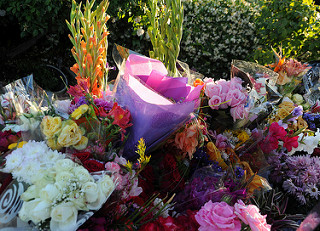

In [154]:
img

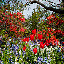

In [156]:
img=image.load_img(r"/content/flowers/tulip/10163955604_ae0b830975_n.jpg",target_size=(64,64))
img

In [157]:
x=image.img_to_array(img)
x

array([[[ 22.,  24.,  19.],
        [ 58.,  70.,  34.],
        [ 90., 157., 210.],
        ...,
        [133., 142., 151.],
        [ 10.,   9.,  14.],
        [  3.,   0.,   4.]],

       [[ 52.,  67.,  28.],
        [ 63.,  54.,  11.],
        [ 13.,  72.,  80.],
        ...,
        [160., 187., 196.],
        [ 29.,  39.,   4.],
        [  5.,   0.,   0.]],

       [[ 74., 118., 105.],
        [ 55.,  92.,  41.],
        [ 46.,  93.,  13.],
        ...,
        [ 39.,  59.,   8.],
        [ 39.,  48.,  29.],
        [ 40.,  25.,  18.]],

       ...,

       [[145., 118., 151.],
        [107., 123., 156.],
        [159., 161., 202.],
        ...,
        [ 93., 126.,  13.],
        [114., 126.,  42.],
        [  8.,   8.,  20.]],

       [[ 74.,  86., 134.],
        [217., 226., 235.],
        [138., 169.,  13.],
        ...,
        [ 42.,  56.,   0.],
        [ 81.,  76., 130.],
        [ 40.,  75.,   0.]],

       [[ 62.,  67.,  26.],
        [118., 130., 172.],
        [155., 1

In [158]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 22.,  24.,  19.],
         [ 58.,  70.,  34.],
         [ 90., 157., 210.],
         ...,
         [133., 142., 151.],
         [ 10.,   9.,  14.],
         [  3.,   0.,   4.]],

        [[ 52.,  67.,  28.],
         [ 63.,  54.,  11.],
         [ 13.,  72.,  80.],
         ...,
         [160., 187., 196.],
         [ 29.,  39.,   4.],
         [  5.,   0.,   0.]],

        [[ 74., 118., 105.],
         [ 55.,  92.,  41.],
         [ 46.,  93.,  13.],
         ...,
         [ 39.,  59.,   8.],
         [ 39.,  48.,  29.],
         [ 40.,  25.,  18.]],

        ...,

        [[145., 118., 151.],
         [107., 123., 156.],
         [159., 161., 202.],
         ...,
         [ 93., 126.,  13.],
         [114., 126.,  42.],
         [  8.,   8.,  20.]],

        [[ 74.,  86., 134.],
         [217., 226., 235.],
         [138., 169.,  13.],
         ...,
         [ 42.,  56.,   0.],
         [ 81.,  76., 130.],
         [ 40.,  75.,   0.]],

        [[ 62.,  67.,  26.],
       

In [162]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 23ms/step


array([2])

In [163]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [164]:
index=['daisy','dandelion','flowers','rose','sunflower','tulip']

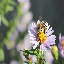

In [166]:
img=image.load_img(r"/content/flowers/daisy/10555749515_13a12a026e.jpg",target_size=(64,64))
img